     tagAzul  resultAzul  goldAzul  killsAzul  towersAzul  inibsAzul  \
0        TSM           1     62729         16           9          2   
9         T8           1     57686         16          11          3   
14       TSM           1     54782         13          11          2   
17       TSM           1     61601         13          10          1   
22       DIG           0     50216          6           5          0   
...      ...         ...       ...        ...         ...        ...   
7005     UOL           0     59260         16           4          0   
7058      TL           1     59153         11          10          1   
7125     FLY           1     97260         14          10          4   
7570     TSM           1    119990         11          11          3   
7598     FOX           1    110413         24           7          1   

      dragonsAzul  baronsAzul  heraldsAzul tagVerm  resultVerm  goldVerm  \
0               1           0            0      C9         

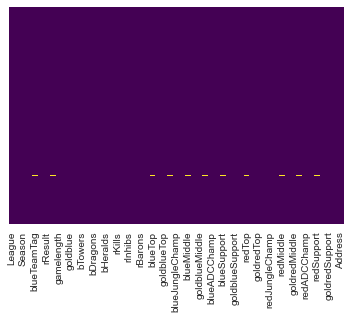

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../datasetLoL/LeagueofLegends.csv')
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from ast import literal_eval
%matplotlib inline

#Acessando o dataset padrão
lol = "..\\datasetLoL\\LeagueofLegends.csv"
dataset = pd.read_csv(lol)
#print(dataset.info()) #Analisando as colunas do dataset e verificando os tipos

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis') #Verificando a presença de dados nulos
#plt.show()

dsAux = dataset.copy(deep=True)

#Colunas a que influenciam na vitórias de uma partida: gold, kills, towers, inhibs, dragons, barons, heralds

dsAux['goldred'] = dsAux['goldred'].apply(literal_eval)
dsAux['goldblue'] = dsAux['goldblue'].apply(literal_eval)
dsAux['rKills'] = dsAux['rKills'].apply(literal_eval)
dsAux['bKills'] = dsAux['bKills'].apply(literal_eval)
dsAux['rTowers'] = dsAux['rTowers'].apply(literal_eval)
dsAux['bTowers'] = dsAux['bTowers'].apply(literal_eval)
dsAux['rInhibs'] = dsAux['rInhibs'].apply(literal_eval)
dsAux['bInhibs'] = dsAux['bInhibs'].apply(literal_eval)
dsAux['rDragons'] = dsAux['rDragons'].apply(literal_eval)
dsAux['bDragons'] = dsAux['bDragons'].apply(literal_eval)
dsAux['rBarons'] = dsAux['rBarons'].apply(literal_eval)
dsAux['bBarons'] = dsAux['bBarons'].apply(literal_eval)
dsAux['rHeralds'] = dsAux['rHeralds'].apply(literal_eval)
dsAux['bHeralds'] = dsAux['bHeralds'].apply(literal_eval)

partidas = pd.DataFrame()

partidas['tagAzul'] = dsAux['blueTeamTag']
partidas['resultAzul'] = dsAux['bResult']
partidas['goldAzul'] = dsAux['goldblue'].apply(max)
partidas['killsAzul'] = dsAux['bKills'].apply(len)
partidas['towersAzul'] = dsAux['bTowers'].apply(len)
partidas['inibsAzul'] = dsAux['bInhibs'].apply(len)
partidas['dragonsAzul'] = dsAux['bDragons'].apply(len)
partidas['baronsAzul'] = dsAux['bBarons'].apply(len)
partidas['heraldsAzul'] = dsAux['bHeralds'].apply(len)

partidas['tagVerm'] = dsAux['redTeamTag']
partidas['resultVerm'] = dsAux['rResult']
partidas['goldVerm'] = dsAux['goldred'].apply(max)
partidas['killsVerm'] = dsAux['rKills'].apply(len)
partidas['towersVerm'] = dsAux['rTowers'].apply(len)
partidas['inibsVerm'] = dsAux['rInhibs'].apply(len)
partidas['dragonsVerm'] = dsAux['rDragons'].apply(len)
partidas['baronsVerm'] = dsAux['rBarons'].apply(len)
partidas['heraldsVerm'] = dsAux['rHeralds'].apply(len)

partidas = partidas[(partidas.tagAzul == 'TSM') | (partidas.tagVerm == 'TSM')]
partidas['timeVencedor'] = np.where(partidas.resultAzul == 1, 1, 2)

print(partidas)
